In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [107]:
# Loading the image using cv2 imread function
img_color = cv2.imread('Formula1.jpeg')
print('image_1 resolution = %d x %d'%(img_color.shape[0], img_color.shape[1]))

image_1 resolution = 800 x 1200


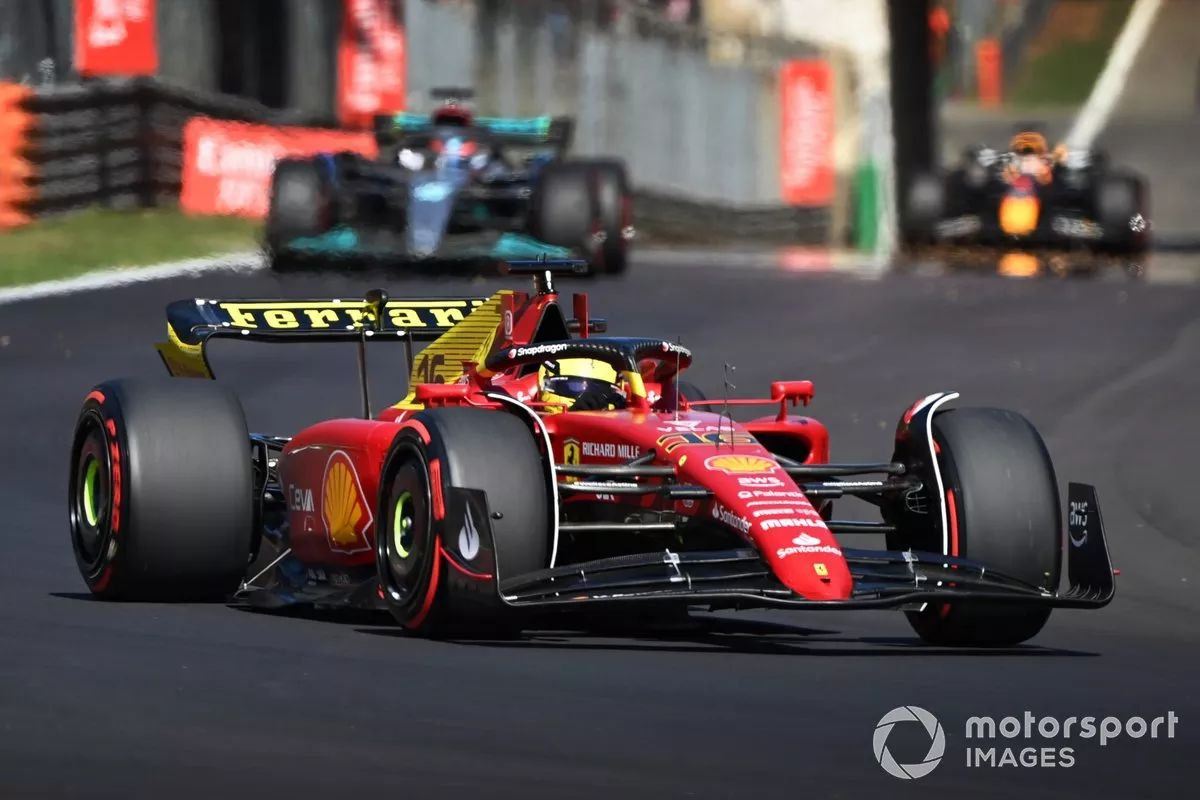

In [108]:
cv2_imshow(img_color)

In [109]:
# converting the image to grayscale so we can use it for fourier transform. crow
img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape

## Fourier Transformation using numpy
We will take out all the low frequency content from the image by using a high pass filter.

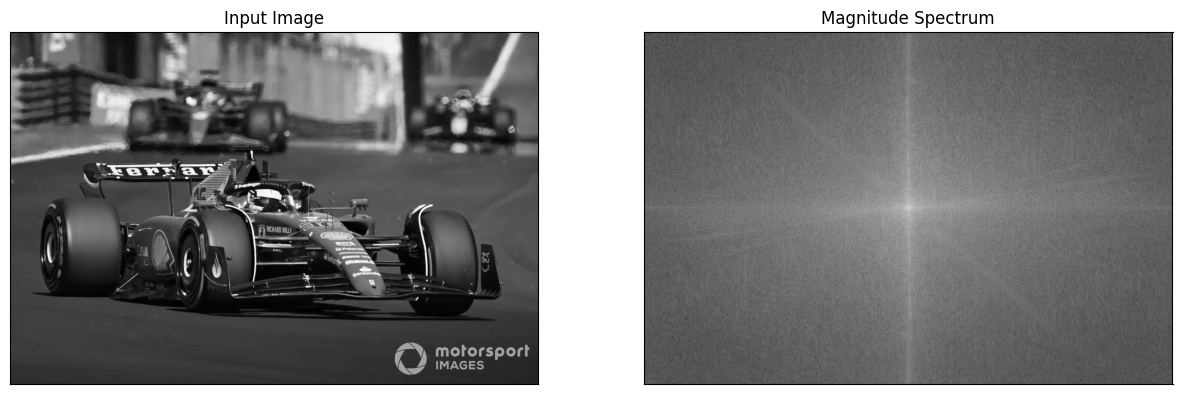

In [110]:
# Using fast fourier transform to get frequency transform.
fourier = np.fft.fft2(img)
# Shifting the zero frequency values (DC component) to the center for better understanding.
fourier_shift = np.fft.fftshift(fourier)
# Calculating the magnitude spectrum
magnitude_spectrum = 20*np.log(np.abs(fourier_shift))

# Plotting the imput image and it's magnitude spectrum
plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

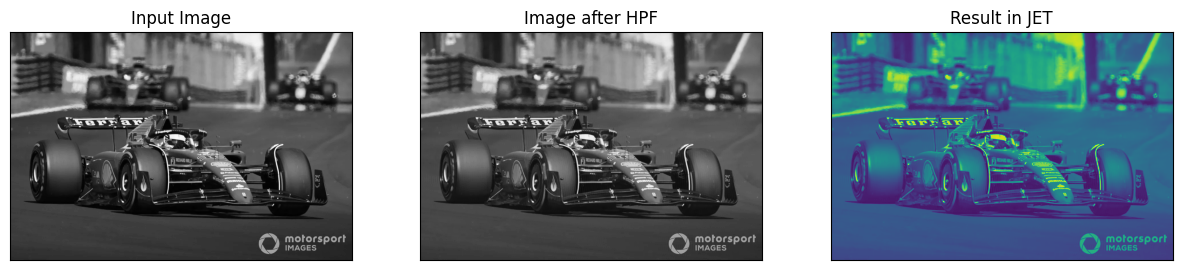

In [111]:
crow = rows //2
ccol = cols//2
# Masking the low frequencies by making a 60*60 window.
fourier_shift[crow-30:crow+31, crow-30:crow+31] = 0
# Using fourier inverse shift to move the DC component back into the corner
fourier_shift_inv = np.fft.ifftshift(fourier_shift)
# Using inverse transform to get the converted image
img_converted = np.fft.ifft2(fourier_shift_inv)
# Converting all the values to real numbers
img_converted = np.real(img_converted)

plt.figure(figsize=(15,5))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_converted, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_converted)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()


## Fourier Transform in Open CV
In the first case we removed the low frequency content from the image using a low pass filter

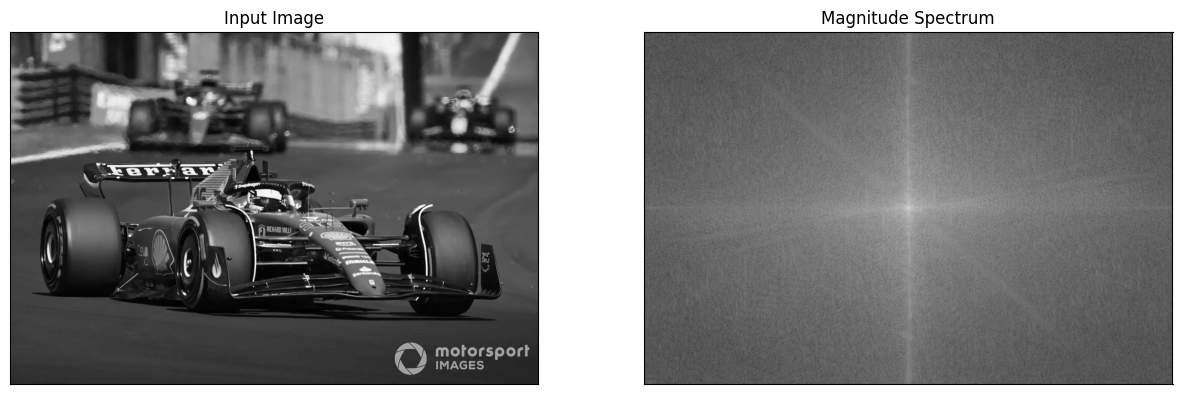

In [112]:
# Using Open CV to get the discrete fourier transformation (DFT)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# Shifting the zero frequency values to the center for understanding
dft_shift = np.fft.fftshift(dft)
# Calculating the magnitude spectrum over all the rows and columns in dft shift matrix.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# Plotting the imput image and it's magnitude spectrum
plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

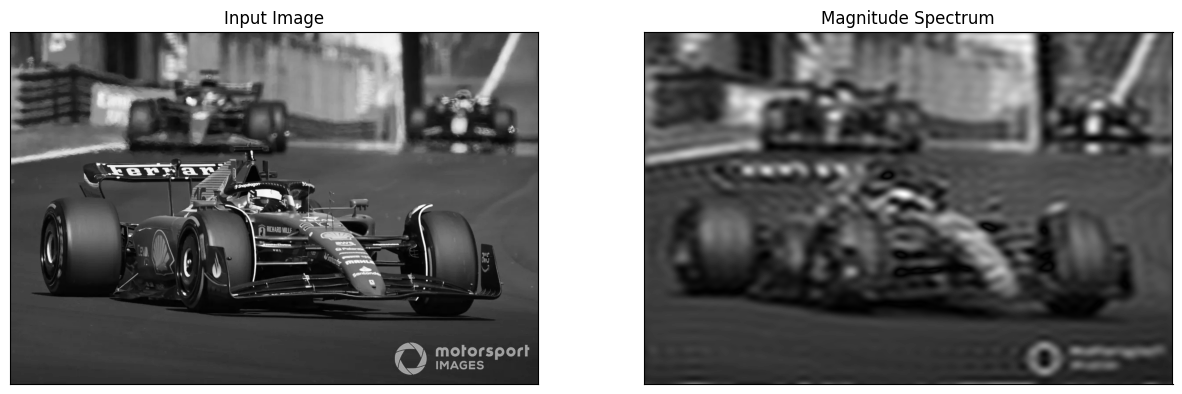

In [113]:
# Just like before we create a 60x60 mask
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Plotting the imput image and it's magnitude spectrum
plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

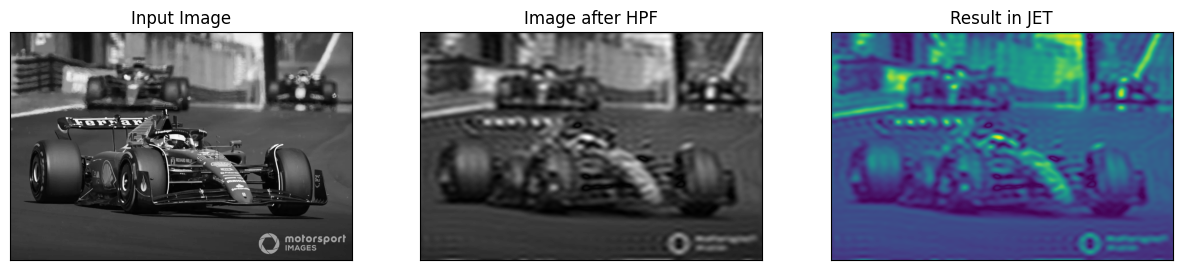

In [114]:
plt.figure(figsize=(15,5))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()
